# Geographic Plotting Utilities

Demonstrates the geographic visualization functions in `examples.map` for
plotting power system data on geographic coordinates. The notebook covers
border overlays from bundled shapefiles, bus voltage visualization with
transmission network overlays, vector field quiver plots, plot formatting
options, and custom colormaps.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from examples.map import (
    format_plot, border, plot_lines, plot_vecfield,
    darker_hsv_colormap,
)

In [6]:
# Plotting functions (hidden from documentation)
import sys; sys.path.insert(0, "..")
from plot_helpers import (
    plot_borders, plot_network_map, plot_bus_voltages_map,
    plot_vecfield_map, plot_format_showcase, plot_colormap_2d,
)

In [7]:
# This cell is hidden in the documentation.
from esapp import PowerWorld
from esapp.components import Branch, Bus
import ast

with open('../data/case.txt', 'r') as f:
    case_path = ast.literal_eval(f.read().strip())

pw = PowerWorld(case_path)

# Configure geographic border shape ('US', 'Texas', etc.)
SHAPE = 'US'

'open' took: 8.2832 sec


## Network Visualization

The  function draws transmission lines from a DataFrame with
endpoint coordinates. Here we combine bus voltage scatter with
transmission lines and geographic borders.

NameError: name 'lines' is not defined

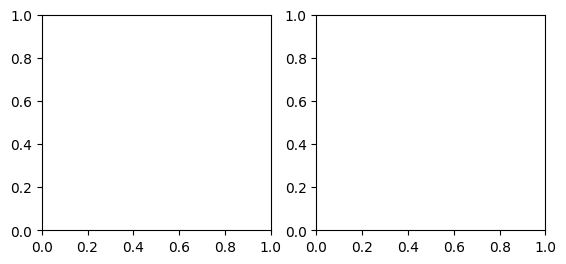

In [8]:
V = pw.pflow()
vmag = np.abs(V)

fig, axes = plt.subplots(1, 2, figsize=(6.5, 2.8))
plot_network_map(lines, lon, lat, SHAPE, ax=axes[0], fig=fig)
plot_bus_voltages_map(lines, lon, lat, vmag, SHAPE, ax=axes[1], fig=fig)
plt.tight_layout()
plt.show()

## Vector Field on Geographic Coordinates

The `plot_vecfield()` function plots arrows colored by angle, useful for
electric field or power flow visualizations.

In [ ]:
# Create a synthetic vector field over the geographic area
pad = 0.5
lon_min, lon_max = lon.min() - pad, lon.max() + pad
lat_min, lat_max = lat.min() - pad, lat.max() + pad

nx_v, ny_v = 20, 15
lons = np.linspace(lon_min, lon_max, nx_v)
lats = np.linspace(lat_min, lat_max, ny_v)
LON, LAT = np.meshgrid(lons, lats)

Ex = 0.3 * np.sin(2 * np.pi * (LON - lon_min) / (lon_max - lon_min))
Ey = np.ones_like(LON)

fig, axes = plt.subplots(1, 2, figsize=(6.5, 2.8))
plot_network_map(lines, lon, lat, SHAPE, ax=axes[0], fig=fig)
axes[0].set_title('Network Topology', fontsize=11)
plot_vecfield_map(LON, LAT, Ex, Ey, lines, SHAPE, ax=axes[1], fig=fig)
plt.tight_layout()
plt.show()